In [1]:
import numpy as np
import pandas as pd
# ^^^ pyforest auto-imports - don't write above this line
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# The Anscombe Quartet

https://en.wikipedia.org/wiki/Anscombe%27s_quartet

In [17]:
df = sns.load_dataset("anscombe")

In [18]:
df

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33
5,I,14.0,9.96
6,I,6.0,7.24
7,I,4.0,4.26
8,I,12.0,10.84
9,I,7.0,4.82


In [20]:
mask = df.dataset == 'I'
# df['dataset'].isin(['I'])
df.loc[mask, :]

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33
5,I,14.0,9.96
6,I,6.0,7.24
7,I,4.0,4.26
8,I,12.0,10.84
9,I,7.0,4.82


In [28]:
df.query('dataset == "III"')

,dataset,x,y
22,III,10.0,7.46
23,III,8.0,6.77
24,III,13.0,12.74
25,III,9.0,7.11
26,III,11.0,7.81
27,III,14.0,8.84
28,III,6.0,6.08
29,III,4.0,5.39
30,III,12.0,8.15
31,III,7.0,6.42


In [24]:
df.mean()

x    9.000000
y    7.500682
dtype: float64

In [25]:
df.std()

x    3.198837
y    1.958925
dtype: float64

In [29]:
df.groupby('dataset').mean()

,x,y
dataset,,
I,9.0,7.500909
II,9.0,7.500909
III,9.0,7.500000
IV,9.0,7.500909


In [30]:
df.groupby('dataset').std()

,x,y
dataset,,
I,3.316625,2.031568
II,3.316625,2.031657
III,3.316625,2.030424
IV,3.316625,2.030579


In [31]:
x1 = [10.0, 8.0,  13.0,  9.0,  11.0, 14.0, 6.0,  4.0,  12.0,  7.0,  5.0]
y1 = [8.04, 6.95, 7.58,  8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68]

x2 = [10.0, 8.0,  13.0,  9.0,  11.0, 14.0, 6.0,  4.0,  12.0,  7.0,  5.0]
y2 = [9.14, 8.14, 8.74,  8.77, 9.26, 8.10, 6.13, 3.10, 9.13,  7.26, 4.74]

x3 = [10.0, 8.0,  13.0,  9.0,  11.0, 14.0, 6.0,  4.0,  12.0,  7.0,  5.0]
y3 = [7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15,  6.42, 5.73]

x4 = [8.0,  8.0,  8.0,   8.0,  8.0,  8.0,  8.0,  19.0,  8.0,  8.0,  8.0]
y4 = [6.58, 5.76, 7.71,  8.84, 8.47, 7.04, 5.25, 12.50, 5.56, 7.91, 6.89]

In [32]:
df = pd.DataFrame({'x1': x1,'y1': y1,
                   'x2': x2,'y2': y2,
                   'x3': x3,'y3': y3,
                   'x4': x4,'y4': y4})

In [33]:
df

,x1,y1,x2,y2,x3,y3,x4,y4
0,10.0,8.04,10.0,9.14,10.0,7.46,8.0,6.58
1,8.0,6.95,8.0,8.14,8.0,6.77,8.0,5.76
2,13.0,7.58,13.0,8.74,13.0,12.74,8.0,7.71
3,9.0,8.81,9.0,8.77,9.0,7.11,8.0,8.84
4,11.0,8.33,11.0,9.26,11.0,7.81,8.0,8.47
5,14.0,9.96,14.0,8.10,14.0,8.84,8.0,7.04
6,6.0,7.24,6.0,6.13,6.0,6.08,8.0,5.25
7,4.0,4.26,4.0,3.10,4.0,5.39,19.0,12.50
8,12.0,10.84,12.0,9.13,12.0,8.15,8.0,5.56
9,7.0,4.82,7.0,7.26,7.0,6.42,8.0,7.91


In [34]:
df.mean()

x1    9.000000
y1    7.500909
x2    9.000000
y2    7.500909
x3    9.000000
y3    7.500000
x4    9.000000
y4    7.500909
dtype: float64

In [35]:
df.std()

x1    3.316625
y1    2.031568
x2    3.316625
y2    2.031657
x3    3.316625
y3    2.030424
x4    3.316625
y4    2.030579
dtype: float64

In [36]:
import matplotlib.pyplot as plt

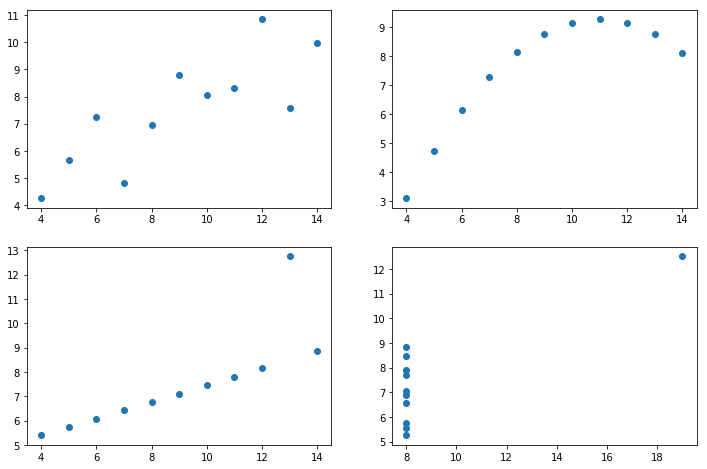

In [37]:
fig, axes = plt.subplots(2,2, figsize=(12,8))
axes[0][0].scatter(df.x1, df.y1)
axes[0][1].scatter(df.x2, df.y2)
axes[1][0].scatter(df.x3, df.y3)
axes[1][1].scatter(df.x4, df.y4)

Anscombe (...) intended to counter the impression among statisticians that "numerical calculations are exact, but graphs are rough."

# The Basics of matplotlib

## Parts of a figure

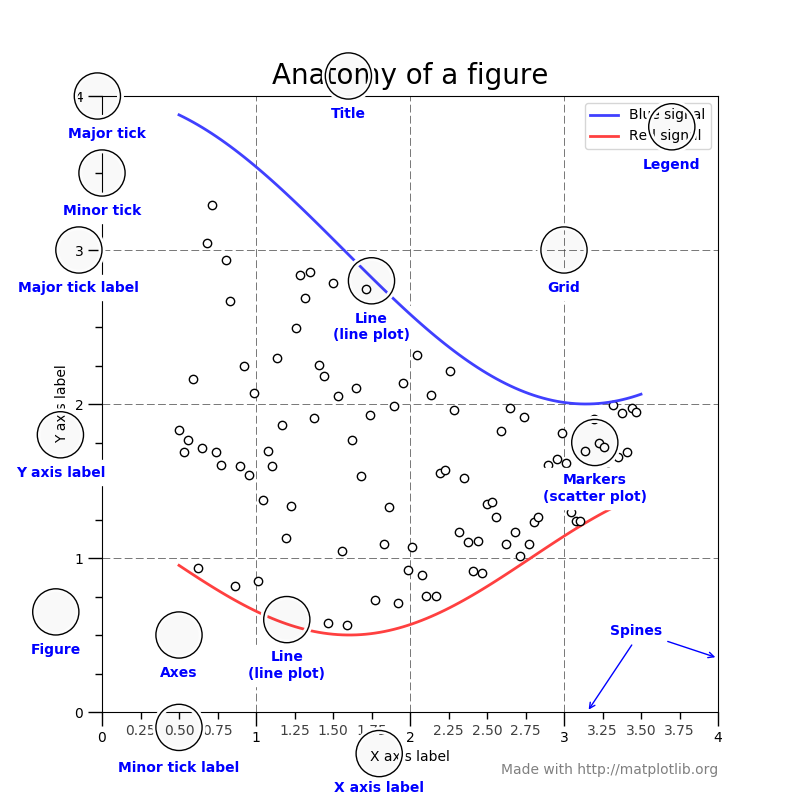

## Terminology

1. **Matplotlib** graphs your data on **Figures**. 

2. Each **Figure** can contain one ore more **Axes**


(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1fa5ab9c588>)

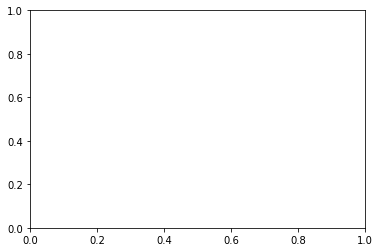

In [39]:
plt.subplots()

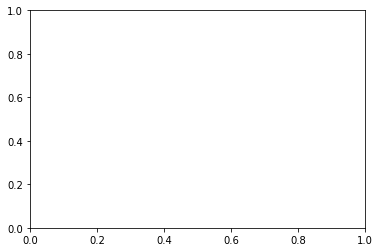

In [44]:
# Create a figure containing a single axes.
fig, ax = plt.subplots()

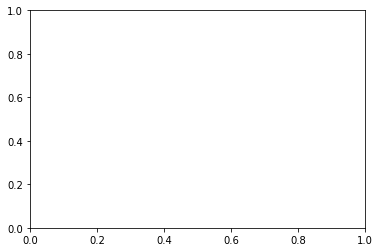

In [45]:
fig

In [46]:
ax

In [ ]:
ax.plot()

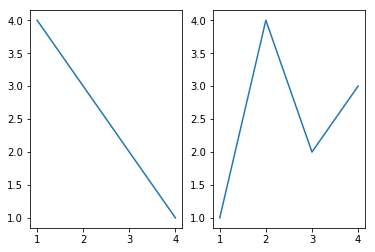

In [56]:
fig, ax = plt.subplots(1, 2)
plt.plot([1, 2, 3, 4], [1, 4, 2, 3])

ax[0].plot([1,2,3,4], [4,3,2,1])

In [53]:
ax

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001FA5AD8D240>,
      dtype=object)

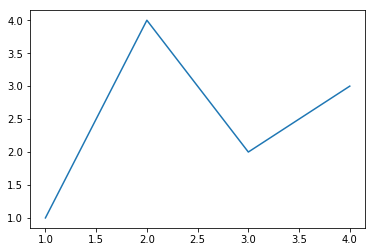

In [47]:
# Create a figure containing a single axes.
fig, ax = plt.subplots()

# Plot some data on the axes.
ax.plot([1, 2, 3, 4], [1, 4, 2, 3]);

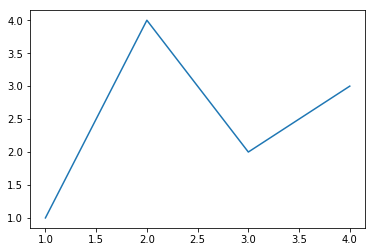

In [51]:
plt.plot([1, 2, 3, 4], [1, 4, 2, 3])

In [ ]:
# fig is the figure itself.
fig

In [ ]:
# axes is the object
ax

## The pyplot (plt) method.

> The plt.plot method connects the dots by a line, by default.

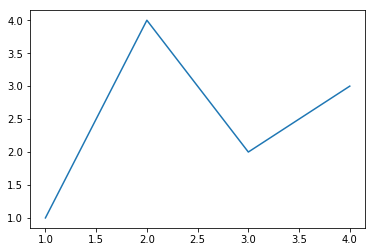

In [59]:
plt.plot([1, 2, 3, 4], [1, 4, 2, 3])

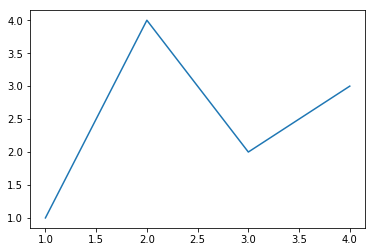

In [60]:
x = [1, 2, 3, 4]
y = [1, 4, 2, 3]
plt.plot(x, y)

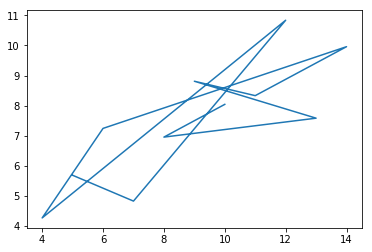

In [63]:
plt.plot(df['x1'], df['y1'])

# Basic Plots

## The `plt` command

We use pyplot to plot a simple straight line.

* The first argument is a list of x coordinates
* The second argument is a list of y coordinates

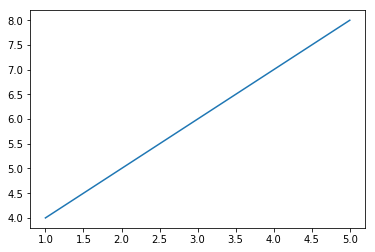

In [66]:
plt.plot([1,2,3,4,5], [4,5,6,7,8]);

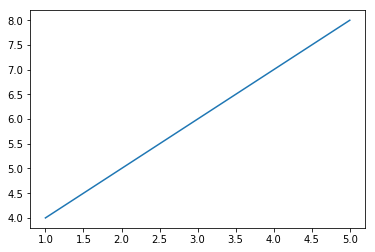

In [69]:
plt.plot([1,2,3,4,5], [4,5,6,7,8])
plt.show()

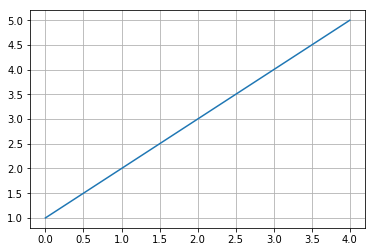

In [71]:
plt.plot([1,2,3,4,5])
# plt.plot([0,1,2,3,4], [1,2,3,4,5])
plt.grid()
plt.show()

In [75]:
import numpy as np

x1 = np.arange(0,5,.25)
x1

array([0.  , 0.25, 0.5 , 0.75, 1.  , 1.25, 1.5 , 1.75, 2.  , 2.25, 2.5 ,
       2.75, 3.  , 3.25, 3.5 , 3.75, 4.  , 4.25, 4.5 , 4.75])

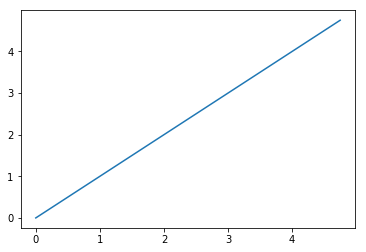

In [88]:
plt.plot(x1, x1)

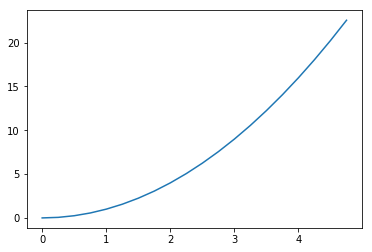

In [89]:
plt.plot(x1, x1**2)

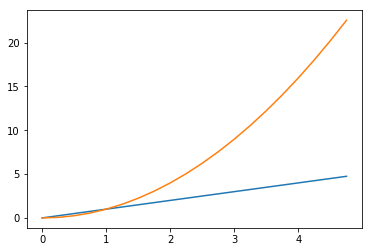

In [91]:
x = plt.plot(x1, x1)
y = plt.plot(x1, x1**2)

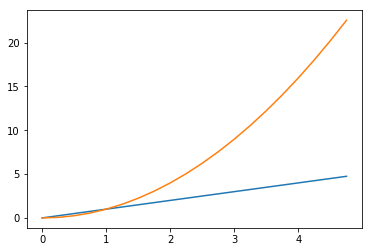

In [85]:
plt.plot(x1, x1)
plt.plot(x1, x1**2)
plt.show()

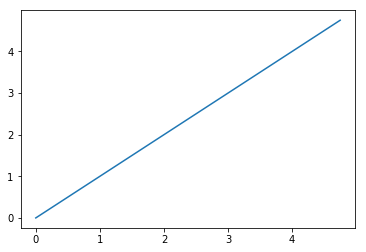

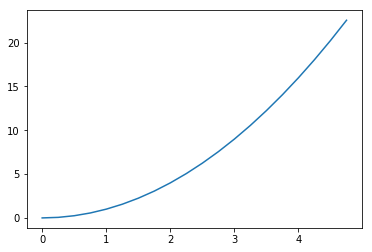

In [99]:
plt.plot(x1, x1)
plt.show()
plt.plot(x1, x1**2)
plt.show()

In [100]:
#ds = ['I','II','III','IV']
#
#for item in ds:
#    x = df.loc[df['dataset'] == item, ['x']]
#    y = df.loc[df['dataset'] == item, ['y']]
#    
#    plt.scatter(x,y)